In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import kpss
from statsmodels.graphics import tsaplots 
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy as np

from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace import sarimax

%matplotlib inline

In [2]:
df = pd.read_csv('../data/interim/airports.csv', index_col=0)

In [3]:
df.head()

,ANC,ATL,BOI,BZN,DEN,DFW,FLL,LAS,LAX,MCO,MIA,MSO,PDX,PHX,SEA,SFO,SJC,TPA
2018-12-30 00:00:00,115.0,11.0,NaN,NaN,123.0,NaN,0.0,343.0,533.0,NaN,283.0,NaN,14.0,389.0,50.0,318.0,NaN,1.0
2018-12-30 01:00:00,14.0,14.0,NaN,NaN,52.0,NaN,147.0,84.0,11.0,NaN,290.0,NaN,11.0,64.0,12.0,7.0,NaN,NaN
2018-12-30 02:00:00,29.0,10.0,NaN,NaN,19.0,NaN,NaN,60.0,NaN,NaN,314.0,NaN,24.0,16.0,110.0,NaN,NaN,NaN
2018-12-30 03:00:00,115.0,216.0,NaN,25.0,353.0,351.0,396.0,762.0,474.0,535.0,704.0,NaN,527.0,524.0,717.0,195.0,35.0,20.0
2018-12-30 04:00:00,305.0,1308.0,483.0,331.0,3006.0,2140.0,3217.0,3189.0,3778.0,3501.0,1796.0,190.0,1778.0,1919.0,3114.0,2361.0,420.0,2267.0


In [4]:
df = df.fillna(0)
df.head()

,ANC,ATL,BOI,BZN,DEN,DFW,FLL,LAS,LAX,MCO,MIA,MSO,PDX,PHX,SEA,SFO,SJC,TPA
2018-12-30 00:00:00,115.0,11.0,0.0,0.0,123.0,0.0,0.0,343.0,533.0,0.0,283.0,0.0,14.0,389.0,50.0,318.0,0.0,1.0
2018-12-30 01:00:00,14.0,14.0,0.0,0.0,52.0,0.0,147.0,84.0,11.0,0.0,290.0,0.0,11.0,64.0,12.0,7.0,0.0,0.0
2018-12-30 02:00:00,29.0,10.0,0.0,0.0,19.0,0.0,0.0,60.0,0.0,0.0,314.0,0.0,24.0,16.0,110.0,0.0,0.0,0.0
2018-12-30 03:00:00,115.0,216.0,0.0,25.0,353.0,351.0,396.0,762.0,474.0,535.0,704.0,0.0,527.0,524.0,717.0,195.0,35.0,20.0
2018-12-30 04:00:00,305.0,1308.0,483.0,331.0,3006.0,2140.0,3217.0,3189.0,3778.0,3501.0,1796.0,190.0,1778.0,1919.0,3114.0,2361.0,420.0,2267.0


In [5]:
df.isna().any().sum()

0

In [6]:
df.duplicated().any()

False

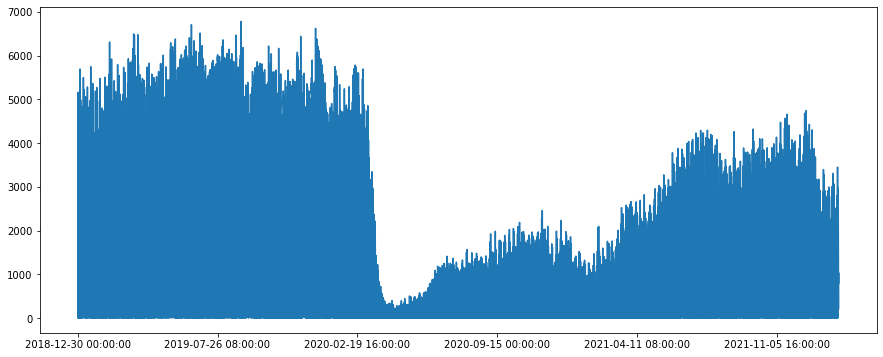

In [7]:
df.SFO.plot(figsize=(15,6));

In [8]:
decomposition = seasonal_decompose(df.SFO, period=24)

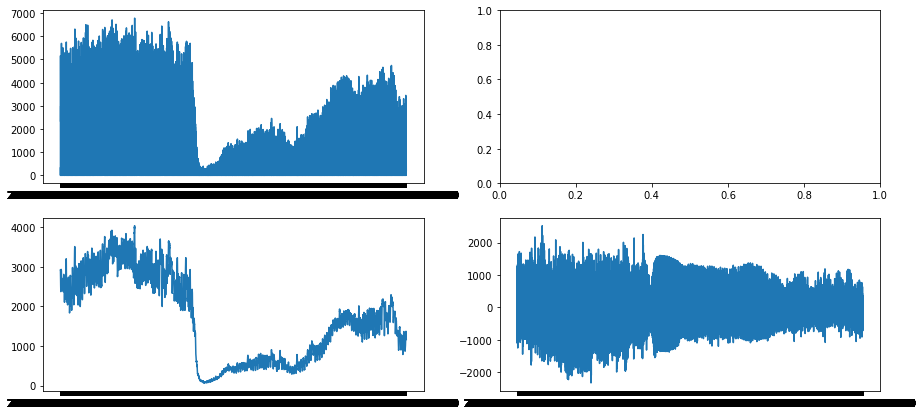

In [9]:
fig, axs = plt.subplots(2, 2, figsize=(15,7))
axs[0,0].plot(df.SFO)
#axs[0,1].plot(decomposition.seasonal)
axs[1,0].plot(decomposition.trend)
axs[1,1].plot(decomposition.resid);

<Figure size 432x288 with 0 Axes>

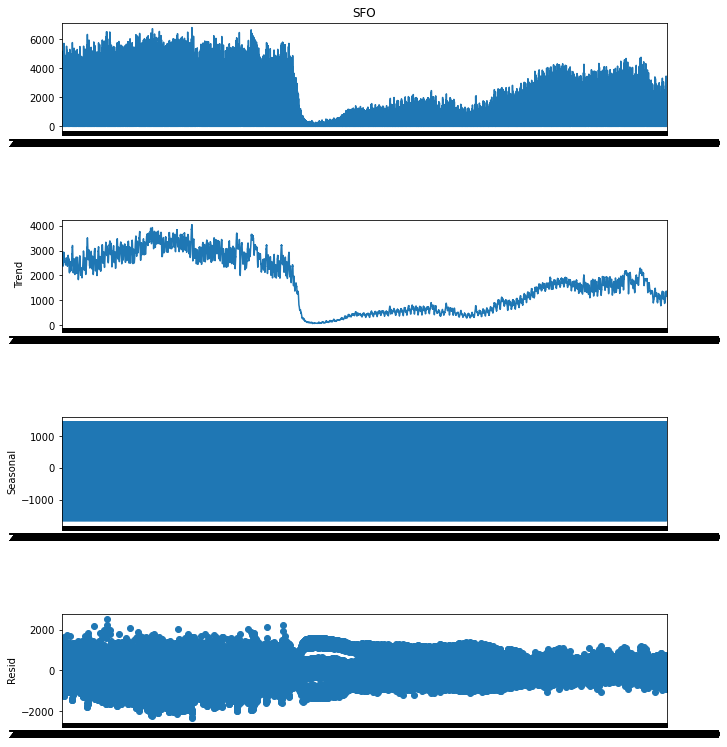

In [10]:
fig = plt.figure()  
fig = decomposition.plot();  
fig.set_size_inches(12, 12)

In [11]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = timeseries.rolling(24).mean()
    rolstd = timeseries.rolling(24).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

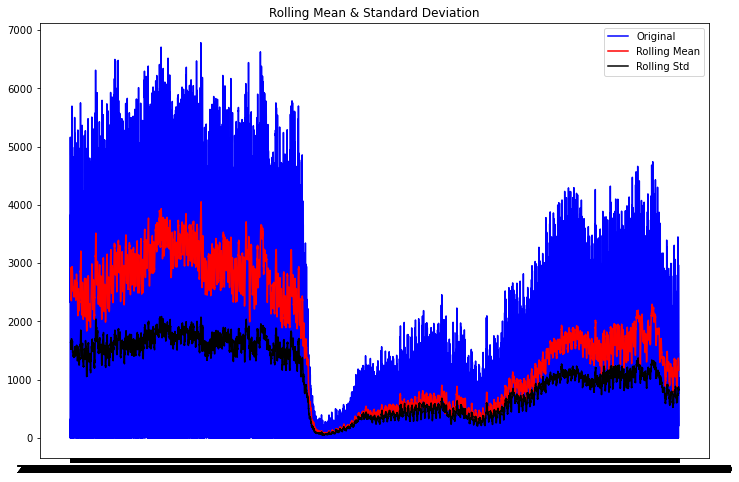

Results of Dickey-Fuller Test:
Test Statistic                    -3.123940
p-value                            0.024831
#Lags Used                        49.000000
Number of Observations Used    27166.000000
Critical Value (1%)               -3.430591
Critical Value (5%)               -2.861646
Critical Value (10%)              -2.566827
dtype: float64


In [12]:
test_stationarity(df.SFO)

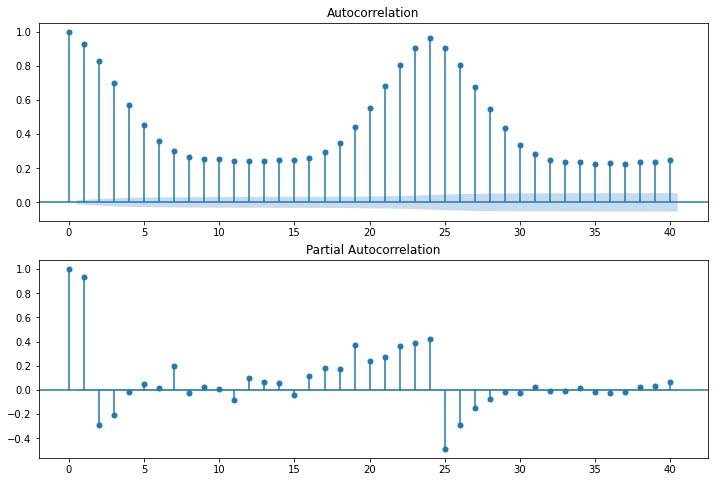

In [13]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df.SFO.dropna(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df.SFO.dropna(), lags=40, ax=ax2)

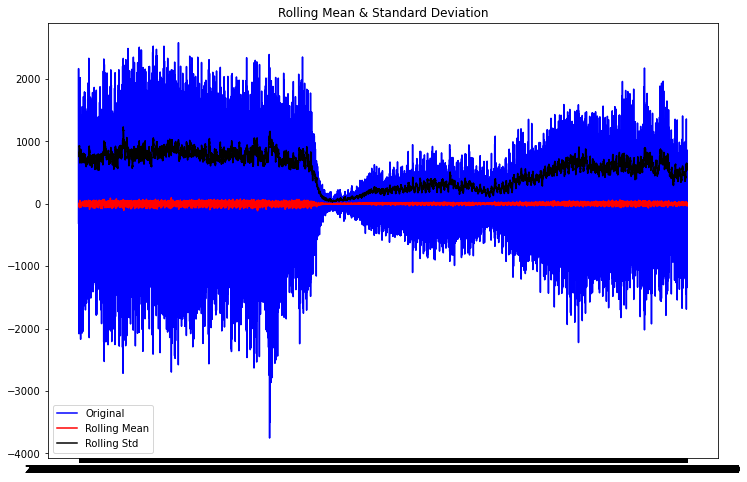

Results of Dickey-Fuller Test:
Test Statistic                   -36.546992
p-value                            0.000000
#Lags Used                        49.000000
Number of Observations Used    27165.000000
Critical Value (1%)               -3.430591
Critical Value (5%)               -2.861646
Critical Value (10%)              -2.566827
dtype: float64


In [14]:
# First differenced
df['first_difference']=df.loc[:,'SFO'] - df.loc[:,'SFO'].shift(1)
test_stationarity(df.first_difference.dropna())

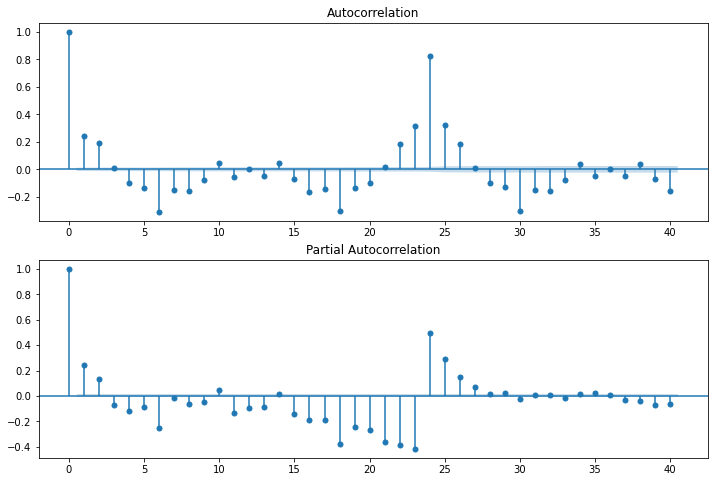

In [15]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df.first_difference.dropna(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df.first_difference.dropna(), lags=40, ax=ax2)

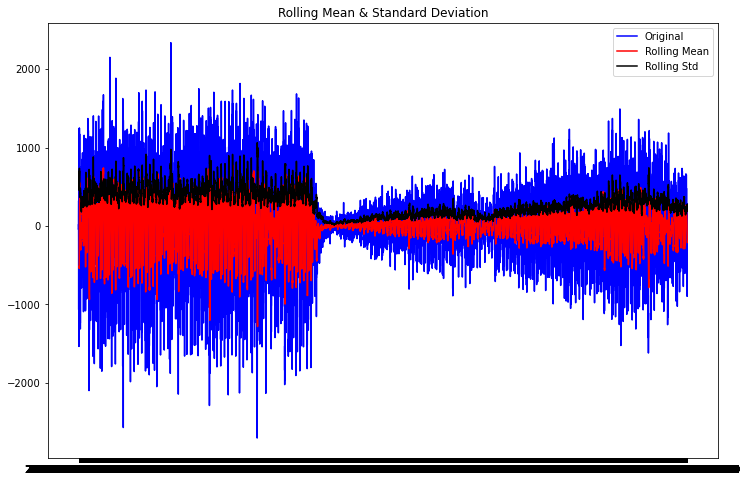

Results of Dickey-Fuller Test:
Test Statistic                   -32.831917
p-value                            0.000000
#Lags Used                        49.000000
Number of Observations Used    27142.000000
Critical Value (1%)               -3.430591
Critical Value (5%)               -2.861646
Critical Value (10%)              -2.566827
dtype: float64


In [16]:
# Seasonal differenced
df['seasonal_difference']=df.SFO - df.SFO.shift(24)
test_stationarity(df.seasonal_difference.dropna())

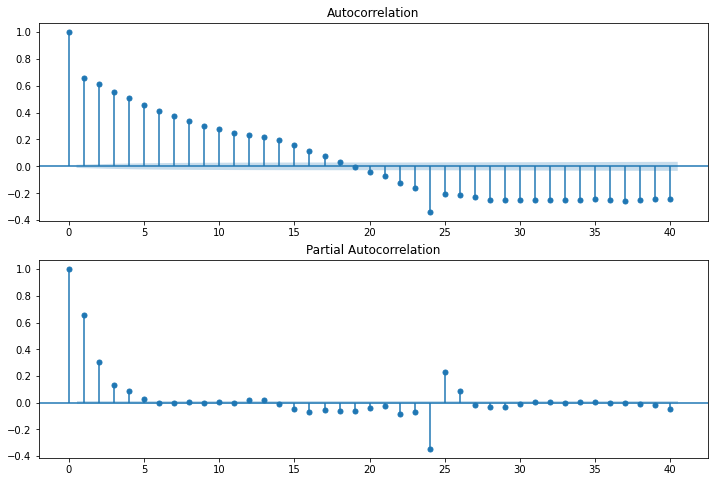

In [26]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df.seasonal_difference.dropna(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df.seasonal_difference.dropna(), lags=40, ax=ax2)

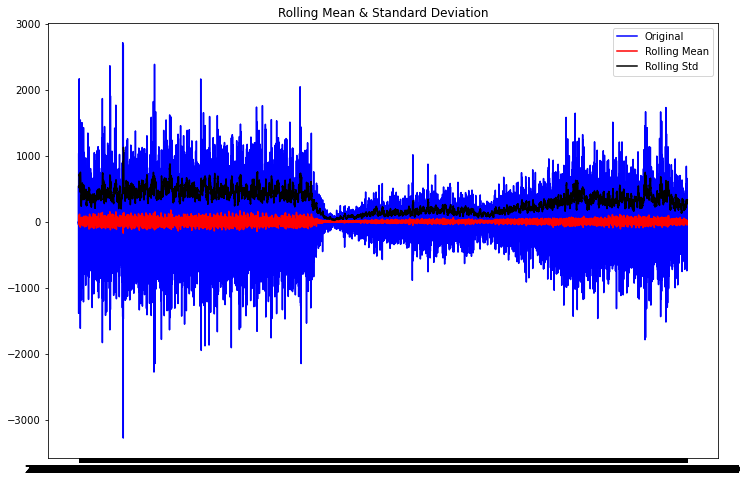

Results of Dickey-Fuller Test:
Test Statistic                   -40.758452
p-value                            0.000000
#Lags Used                        49.000000
Number of Observations Used    27141.000000
Critical Value (1%)               -3.430591
Critical Value (5%)               -2.861646
Critical Value (10%)              -2.566827
dtype: float64


In [18]:
# Seasonal and non-seasonal differenced
df['seasonal_first_difference']=df.first_difference - df.first_difference.shift(24)
test_stationarity(df.seasonal_first_difference.dropna())

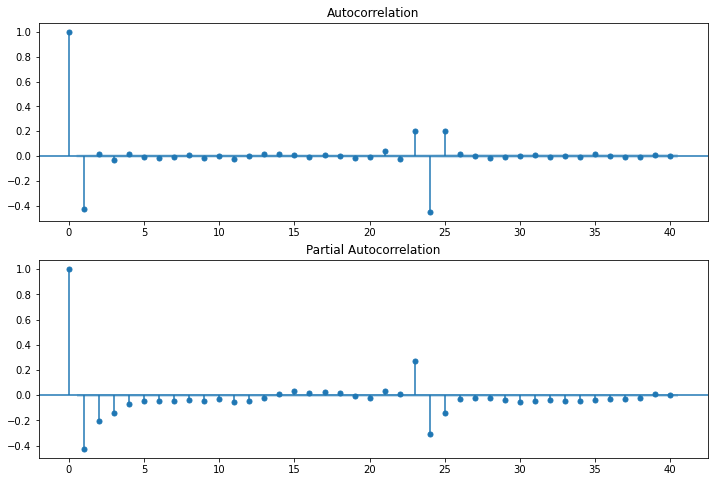

In [19]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df.seasonal_first_difference.dropna(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df.seasonal_first_difference.dropna(), lags=40, ax=ax2)

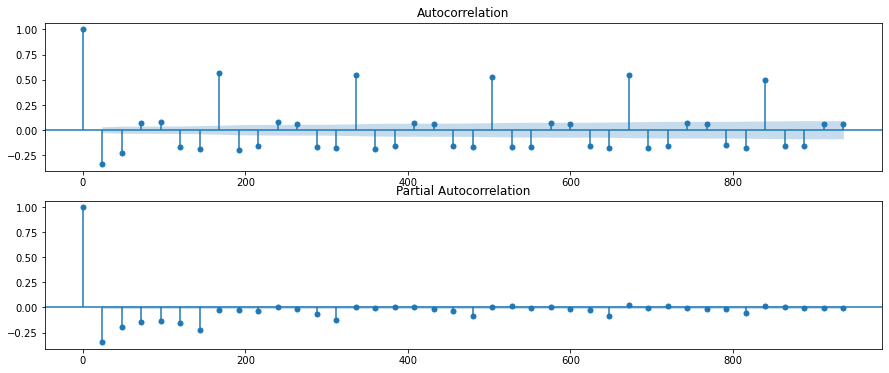

In [55]:
# Seasonal autocorrelation for seasonally differenced series
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(15,6))
lags=[l*24 for l in range(40)]
sm.graphics.tsa.plot_acf(df.seasonal_difference.dropna(),  lags=lags, ax=ax1)
sm.graphics.tsa.plot_pacf(df.seasonal_difference.dropna(), lags=lags, ax=ax2)
plt.show()

/Users/shaghayeghroshan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


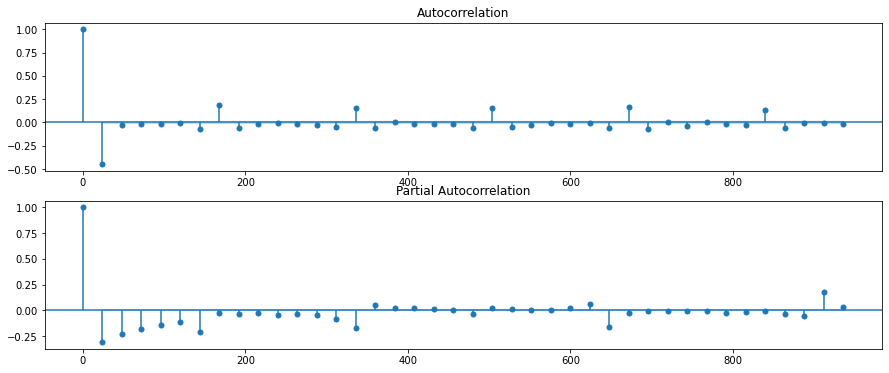

In [56]:
# Seasonal autocorrelation for seasonally differenced series
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(15,6))
lags=[l*24 for l in range(40)]
sm.graphics.tsa.plot_acf(df.seasonal_first_difference.dropna(),  lags=lags, ax=ax1)
sm.graphics.tsa.plot_pacf(df.seasonal_first_difference.dropna(), lags=lags, ax=ax2)
plt.show()

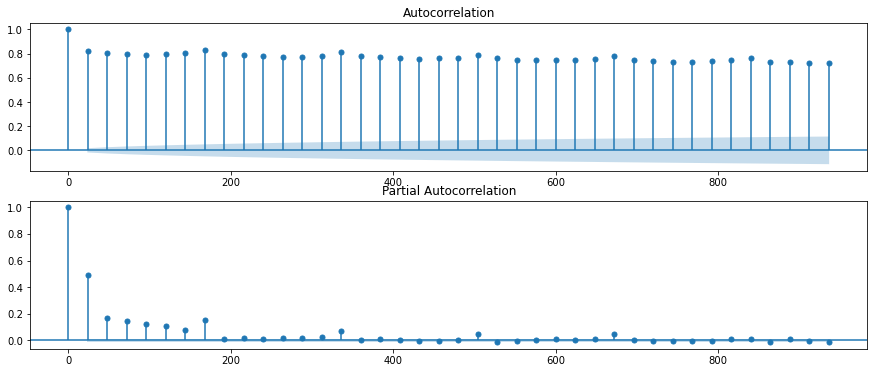

In [57]:
# Seasonal autocorrelation for first differenced series
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(15,6))
lags=[l*24 for l in range(40)]
sm.graphics.tsa.plot_acf(df.first_difference.dropna(),  lags=lags, ax=ax1)
sm.graphics.tsa.plot_pacf(df.first_difference.dropna(), lags=lags, ax=ax2)
plt.show()

In [59]:
p=1
q=1
d=0
P=1
Q=1
D=1
S=24
model = SARIMAX(df.seasonal_first_difference.dropna(), order=(p,d,q), seasonal_order = (P,D,Q,S))
model_fit = model.fit()
forecast = model_fit.forecast(24)

/Users/shaghayeghroshan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
/Users/shaghayeghroshan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.34342D+00    |proj g|=  5.17920D-02


 This problem is unconstrained.



At iterate    5    f=  7.31045D+00    |proj g|=  5.37817D-03

At iterate   10    f=  7.30257D+00    |proj g|=  1.40192D-03

At iterate   15    f=  7.09924D+00    |proj g|=  4.84934D-02

At iterate   20    f=  7.07611D+00    |proj g|=  1.96143D-02

At iterate   25    f=  7.05329D+00    |proj g|=  1.51652D-01

At iterate   30    f=  7.03315D+00    |proj g|=  2.86908D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     32     42      1     0     0   9.383D-06   7.033D+00
  F =   7.0331481065517654     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


In [60]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:          seasonal_first_difference   No. Observations:                27191
Model:             SARIMAX(1, 0, 1)x(1, 1, 1, 24)   Log Likelihood             -191238.330
Date:                            Fri, 08 Apr 2022   AIC                         382486.660
Time:                                    08:42:31   BIC                         382527.709
Sample:                                12-31-2018   HQIC                        382499.894
                                     - 02-05-2022                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0935      0.008     11.914      0.000       0.078       0.109
ma.L1         -0.6233      0.006    -96.289      0.000      -0.636      -0.611
ar.S.L24      -0.4271      0.004   -112.817      0.000      -0.434      -0.420
ma.S.L24      -1.0000      0.005   -183.284      0.000      -1.011      -0.989
sigma2      7.568e+04   7.21e-08   1.05e+12      0.000    7.57e+04    7.57e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.46   Jarque-Bera (JB):             10636.36
Prob(Q):                              0.50   Prob(JB):                         0.00
Heteroskedasticity (H):               0.40   Skew:                             0.01
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.28e+26. Standard errors may be unstable.
"""

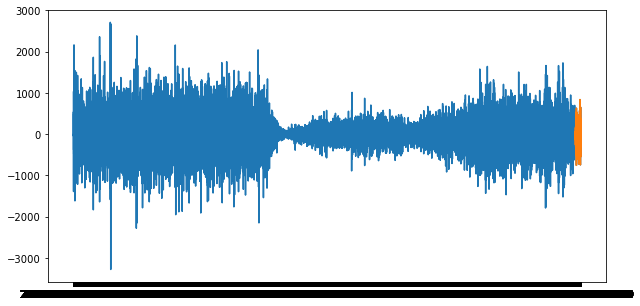

In [61]:
# Declare a variable called forecast_period with the amount of months to forecast, and
# create a range of future dates that is the length of the periods you've chosen to forecast
forecast_period = 24
date_range = pd.date_range(df.seasonal_first_difference.index[-1], periods = forecast_period, 
              freq='M').strftime("%Y-%m-%d").tolist()

# Convert that range into a dataframe that includes your predictions
future_months = pd.DataFrame(date_range, columns = ['Month'])
future_months['Month'] = pd.to_datetime(future_months['Month'])
future_months.set_index('Month', inplace = True)
future_months['Prediction'] = forecast[0]

# Plot your future predictions
plt.figure(figsize=(10,5))
plt.plot(df.seasonal_first_difference)
plt.plot(df.seasonal_first_difference.loc['2022-01-25':]).append(future_months['Prediction']);

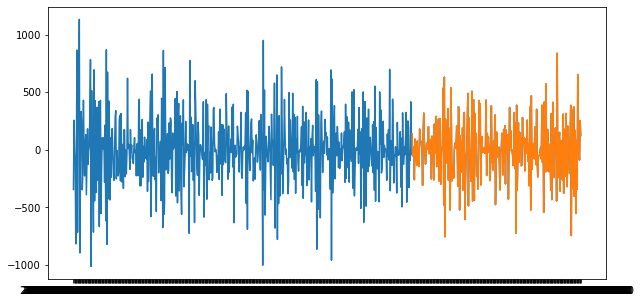

In [62]:
# Plot your future predictions
plt.figure(figsize=(10,5))
plt.plot(df.seasonal_first_difference.loc['2022-01-01':]);
plt.plot(df.seasonal_first_difference.loc['2022-01-25':]).append(future_months['Prediction']);

In [20]:
# Make a function called evaluate_arima_model to find the MSE of a single ARIMA model 
def evaluate_arima_model(data, arima_order):
    # Needs to be an integer because it is later used as an index.
    # Use int()
    split=int(len(data) * 0.8) 
    # Make train and test variables, with 'train, test'
    train, test = data[0:split], data[split:len(data)]
    past=[x for x in train]
    # make predictions. Declare a variable with that name
    predictions = list()
    for i in range(len(test)):#timestep-wise comparison between test data and one-step prediction ARIMA model. 
        model = ARIMA(past, order=arima_order)
        model_fit = model.fit(disp=0)
        future = model_fit.forecast()[0]
        # Append() here
        predictions.append(future)
        past.append(test[i])
    # calculate out of sample error
    error = mean_squared_error(test, predictions)
    # Return the error
    return error

In [21]:
# Make a function to evaluate different ARIMA models with several different p, d, and q values.
def evaluate_models(dataset, p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None
    # Iterate through p_values
    for p in p_values:
        # Iterate through d_values
        for d in d_values:
            # Iterate through q_values
            for q in q_values:
                # p, d, q iterator variables in that order
                order = (p,d,q)
                try:
                    # Make a variable called mse for the Mean squared error
                    mse = evaluate_arima_model(dataset, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.3f' % (order,mse))
                except:
                    continue
    return print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))

In [27]:
# Now, we choose a couple of values to try for each parameter.
p_values = [x for x in range(0, 3)]
d_values = [x for x in range(0, 3)]
q_values = [x for x in range(0, 3)]

In [ ]:
# Finally, we can find the optimum ARIMA model for our data.
# Nb. this can take a while...!
import warnings
warnings.filterwarnings("ignore")
evaluate_models(df.SFO.values, p_values, d_values, q_values)